In [1]:
from feature_extractors.SIFT import *
import cv2
# Show the figures / plots inside the notebook
%matplotlib inline

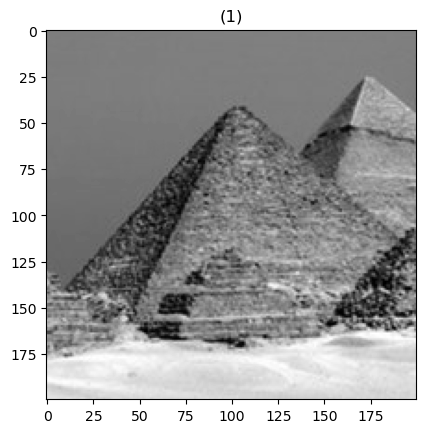

In [2]:
# Preparing the test image
pyramids = io.imread("images/pyramids.jpeg")
grayscale_pyramids = (rgb2gray(pyramids) * 255).astype(np.float32)
grayscale_pyramids = grayscale_pyramids[500:700, 200:400]
show_images([grayscale_pyramids])

Generating base image...


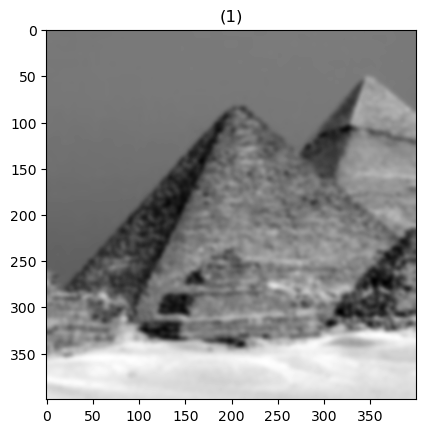

array([[125.09117 , 125.09117 , 125.09118 , ..., 126.91465 , 126.91465 ,
        126.91465 ],
       [125.09113 , 125.09115 , 125.091156, ..., 126.91922 , 126.91922 ,
        126.91922 ],
       [125.09102 , 125.09105 , 125.09111 , ..., 126.946396, 126.946396,
        126.946396],
       ...,
       [224.93419 , 224.86043 , 224.6605  , ..., 214.77867 , 214.57396 ,
        214.4761  ],
       [225.1099  , 225.07042 , 224.96684 , ..., 214.89098 , 214.66087 ,
        214.55385 ],
       [225.16676 , 225.13948 , 225.07016 , ..., 214.94995 , 214.71176 ,
        214.60178 ]], dtype=float32)

In [3]:
base_image = generateBaseImage(grayscale_pyramids, 2, 0)
show_images([base_image])
base_image

In [4]:
num_octaves = computeNumberOfOctaves(base_image.shape)
num_octaves

8

In [5]:
gaussian_sigmas = generateGaussianSigmas(0.4, 3)
gaussian_sigmas

Generating scales...


array([0.4       , 0.30656837, 0.38625195, 0.48664696, 0.61313675,
       0.7725039 ])

In [6]:
gaussian_images = generateGaussianImages(base_image, num_octaves, gaussian_sigmas)
gaussian_images

Generating Gaussian images...


array([[array([[125.09117 , 125.09117 , 125.09118 , ..., 126.91465 , 126.91465 ,
                126.91465 ],
               [125.09113 , 125.09115 , 125.091156, ..., 126.91922 , 126.91922 ,
                126.91922 ],
               [125.09102 , 125.09105 , 125.09111 , ..., 126.946396, 126.946396,
                126.946396],
               ...,
               [224.93419 , 224.86043 , 224.6605  , ..., 214.77867 , 214.57396 ,
                214.4761  ],
               [225.1099  , 225.07042 , 224.96684 , ..., 214.89098 , 214.66087 ,
                214.55385 ],
               [225.16676 , 225.13948 , 225.07016 , ..., 214.94995 , 214.71176 ,
                214.60178 ]], dtype=float32)                                    ,
        array([[125.09118 , 125.09118 , 125.09119 , ..., 126.9147  , 126.9147  ,
                126.9147  ],
               [125.09114 , 125.091156, 125.09116 , ..., 126.919334, 126.919334,
                126.919334],
               [125.09103 , 125.09106 , 125.091

In [7]:
dog_images = generateDoGImages(gaussian_images)
dog_images

Generating Difference-of-Gaussian images...


array([[array([[ 7.6293945e-06,  7.6293945e-06,  7.6293945e-06, ...,
                 5.3405762e-05,  5.3405762e-05,  5.3405762e-05],
               [ 7.6293945e-06,  7.6293945e-06,  7.6293945e-06, ...,
                 1.1444092e-04,  1.1444092e-04,  1.1444092e-04],
               [ 7.6293945e-06,  7.6293945e-06,  7.6293945e-06, ...,
                 2.2125244e-04,  2.2125244e-04,  2.2125244e-04],
               ...,
               [-1.3427734e-03, -1.3122559e-03, -1.2817383e-03, ...,
                -3.0517578e-05,  1.0528564e-03,  1.5258789e-03],
               [-9.6130371e-04, -9.9182129e-04, -1.1291504e-03, ...,
                -6.8664551e-04,  4.1198730e-04,  9.0026855e-04],
               [-8.0871582e-04, -8.6975098e-04, -1.0833740e-03, ...,
                -9.7656250e-04,  1.3732910e-04,  6.1035156e-04]], dtype=float32),
        array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
                 3.0517578e-04,  3.0517578e-04,  3.0517578e-04],
               [-7.629394

In [8]:
keypoints = findScaleSpaceExtrema(gaussian_images,dog_images,3,0.4,5)
len(keypoints)

Finding scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-space extrema...
Localizing scale-

493

In [9]:
keypoints = removeDuplicateKeypoints(keypoints)
len(keypoints)

492

In [10]:
keypoints = convertKeypointsToInputImageSize(keypoints)
keypoints

[< cv2.KeyPoint 000002212C38A340>,
 < cv2.KeyPoint 000002212C38A310>,
 < cv2.KeyPoint 000002212C389F20>,
 < cv2.KeyPoint 000002212C3890B0>,
 < cv2.KeyPoint 000002212C38A4F0>,
 < cv2.KeyPoint 000002212C38A7C0>,
 < cv2.KeyPoint 000002212C3890E0>,
 < cv2.KeyPoint 000002212C38A520>,
 < cv2.KeyPoint 000002212C389C50>,
 < cv2.KeyPoint 000002212C38A370>,
 < cv2.KeyPoint 000002212C389F50>,
 < cv2.KeyPoint 000002212C38BD50>,
 < cv2.KeyPoint 000002212C388C30>,
 < cv2.KeyPoint 000002212C38A100>,
 < cv2.KeyPoint 000002212C389B60>,
 < cv2.KeyPoint 000002212C38BC30>,
 < cv2.KeyPoint 000002212C3893E0>,
 < cv2.KeyPoint 000002212C389110>,
 < cv2.KeyPoint 000002212C388CC0>,
 < cv2.KeyPoint 000002212C38A430>,
 < cv2.KeyPoint 000002212C388840>,
 < cv2.KeyPoint 000002212C389590>,
 < cv2.KeyPoint 000002212C38A130>,
 < cv2.KeyPoint 000002212C389C80>,
 < cv2.KeyPoint 000002212C38AB80>,
 < cv2.KeyPoint 000002212C38AD90>,
 < cv2.KeyPoint 000002212C388F60>,
 < cv2.KeyPoint 000002212C38A6A0>,
 < cv2.KeyPoint 0000

In [11]:
# Draw keypoints on the image
keypoint_image = cv2.drawKeypoints(grayscale_pyramids.astype(np.uint8), keypoints, None)

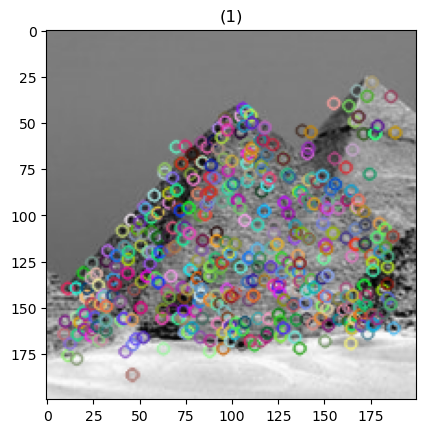

In [12]:
show_images([keypoint_image])

In [13]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT features in the grayscale image
keypoints_test = sift.detect(grayscale_pyramids.astype(np.uint8), None)

# Draw keypoints on the grayscale image
keypoint_image_test = cv2.drawKeypoints(grayscale_pyramids.astype(np.uint8), keypoints_test, None)

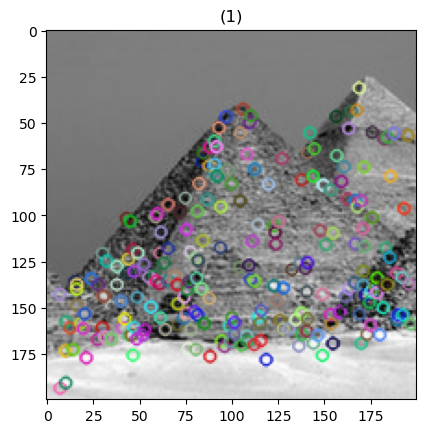

In [14]:
show_images([keypoint_image_test])